<a href="https://colab.research.google.com/github/gosandayo/Exercises_for_Akari/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.9

In [1]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False,
                                parser='auto')


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [27]:
X_train = X_mnist[:60000]
y_train = y_mnist[:60000]
X_test = X_mnist[60000:70000]
y_test = y_mnist[60000:70000]
rdf = RandomForestClassifier(random_state = 42)

かかった時間を測定

In [12]:
%time rdf.fit(X_train, y_train)

CPU times: user 1min 5s, sys: 113 ms, total: 1min 5s
Wall time: 1min 20s


RandomForestClassifier(random_state=42)

スコアを計算

In [11]:
y_pred = rdf.predict(X_test)
rdf.score(X_test, y_test)

0.9705

PCA(因子率95%)で次元削減してからやってみる

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
rdf_with_pca = RandomForestClassifier(random_state = 42)

In [25]:
%time rdf_with_pca.fit(X_train_reduced, y_train)

CPU times: user 2min 36s, sys: 214 ms, total: 2min 36s
Wall time: 2min 37s


RandomForestClassifier(random_state=42)

余計時間がかかってしまったが，どうやらそういうこともあるらしい。

In [26]:
y_pred = rdf_with_pca.predict(X_test_reduced)
rdf_with_pca.score(X_test_reduced, y_test)

0.9488

まあ，情報量が減っているので精度は悪くなる．

# 8.10

In [28]:
from sklearn.manifold import TSNE

In [29]:
X_sample, y_sample = X_mnist[:5000], y_mnist[:5000]

tsne = TSNE(n_components = 2, random_state = 42)
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: user 53.3 s, sys: 85.3 ms, total: 53.4 s
Wall time: 57.9 s


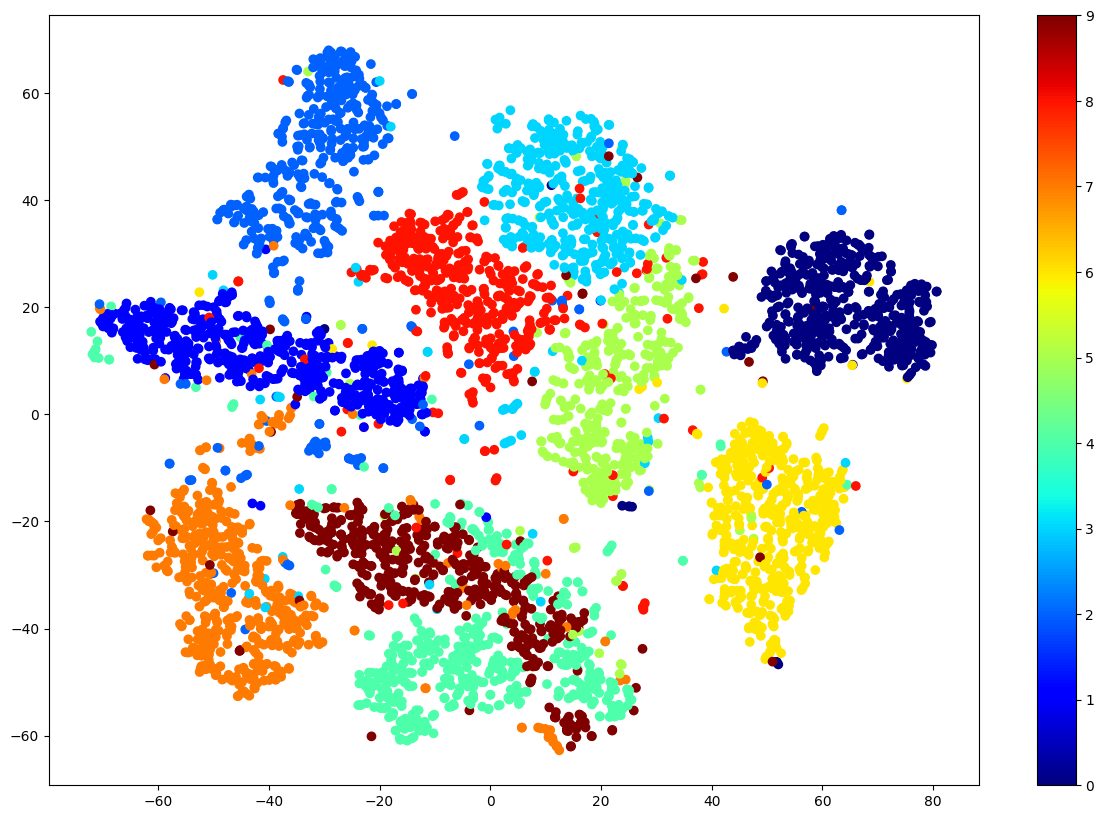

In [47]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize = (15,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1] ,c=y_sample.astype(np.int8), cmap = "jet")
plt.colorbar()
plt.show()

PCAかませてみる．

In [40]:
pca = PCA(n_components = 0.95)
X_sample_pca = pca.fit_transform(X_sample)
%time X_pca_reduced = tsne.fit_transform(X_sample_pca)

ちょっとだけ早くなった．

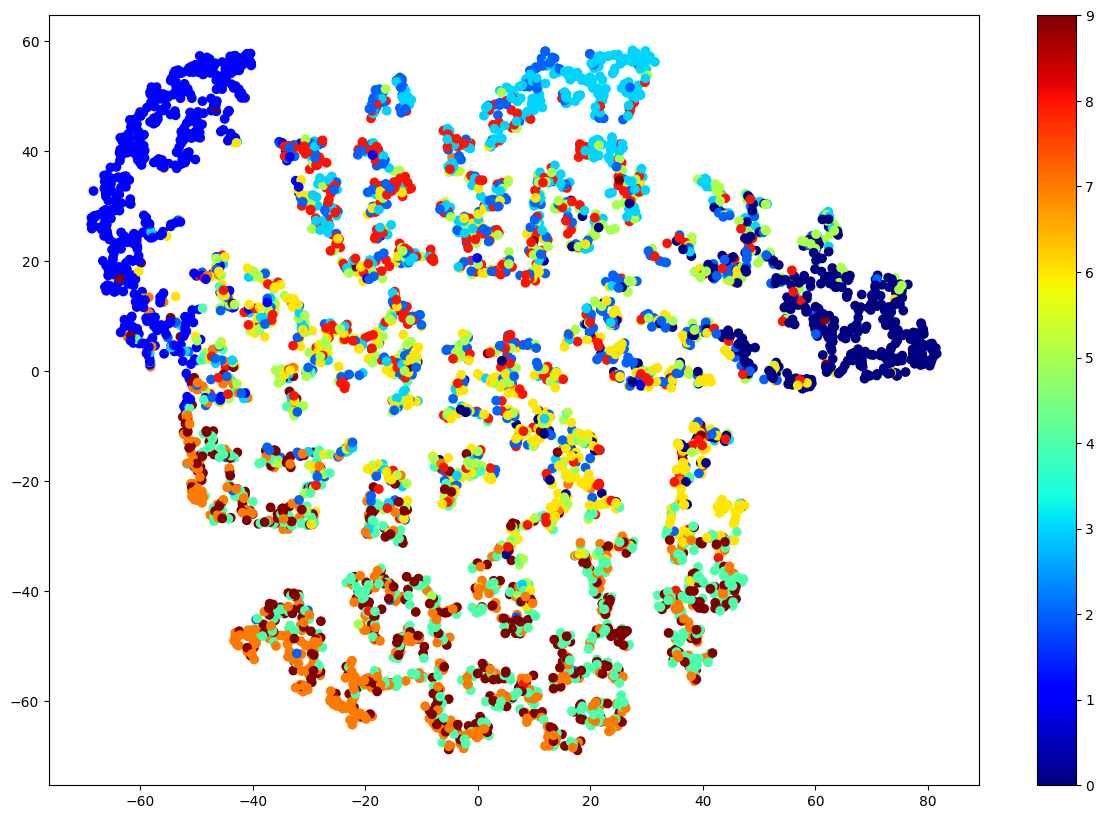

In [48]:
plt.figure(figsize = (15,10))
plt.scatter(X_pca_reduced[:,0], X_pca_reduced[:,1] ,c=y_sample.astype(np.int8), cmap = "jet")
plt.colorbar()
plt.show()

散布図はそんなに変わらない．茶色とエメラルドグリーンの境界がちょっと曖昧になった？というくらい

PCA単体

In [42]:
pca = PCA(n_components = 2, random_state = 42)
X_sample_pca = pca.fit_transform(X_sample)
%time X_pca_reduced = tsne.fit_transform(X_sample_pca)

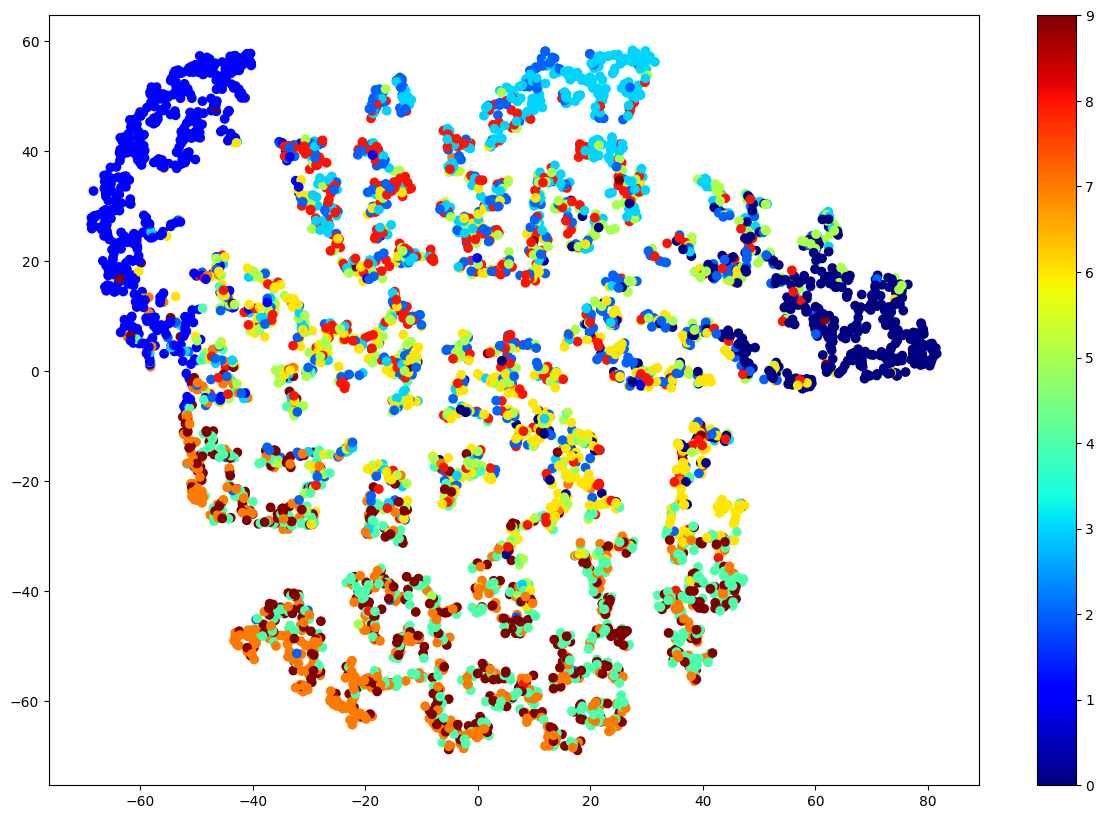

In [49]:
plt.figure(figsize = (15,10))
plt.scatter(X_pca_reduced[:,0], X_pca_reduced[:,1] ,c=y_sample.astype(np.int8), cmap = "jet")
plt.colorbar()
plt.show()

全然ダメ．

LLEでやってみる

In [45]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = 2, random_state = 42)
%time X_reduced_lle = lle.fit_transform(X_sample)

CPU times: user 4.41 s, sys: 42.6 ms, total: 4.45 s
Wall time: 6.09 s


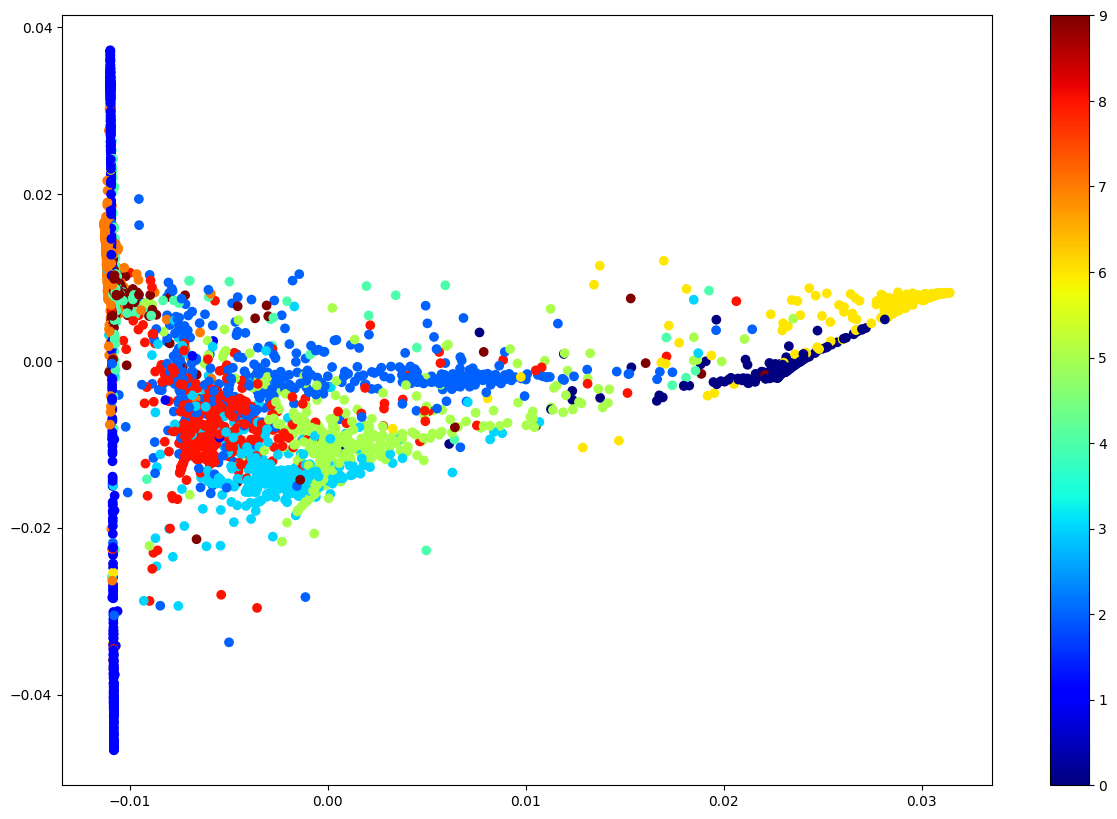

In [50]:
plt.figure(figsize = (15,10))
plt.scatter(X_reduced_lle[:,0], X_reduced_lle[:,1] ,c=y_sample.astype(np.int8), cmap = "jet")
plt.colorbar()
plt.show()

うーん．．．

t-SNEが一番わかりやすく分類できていた．